<a href="https://colab.research.google.com/github/Davidnazal/Struktur-data/blob/main/2410506005_Strukdat_Djikstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx matplotlib

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous


In [ ]:
def get_path(previous, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path


In [ ]:
def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000,
            font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Garis tebal untuk jalur terpendek
    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Visualisasi Graf dan Jalur Terpendek")
    plt.axis('off')
    plt.show()


Jarak dari A ke Z: 13
Jalur: A -> C -> B -> D -> E -> Z


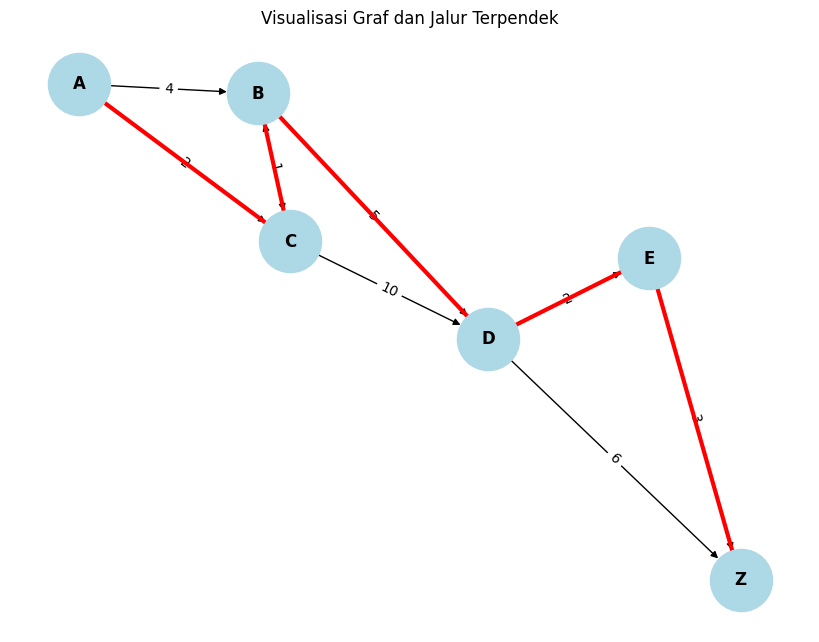

In [ ]:
# Definisi graf
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'B': 1, 'D': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {}
}

# Jalankan Dijkstra
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

# Rekonstruksi jalur
shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' -> '.join(shortest_path)}")

# Visualisasi
visualize_graph(graph, path=shortest_path)


Jarak dari A ke Z: 13
Jalur: A -> C -> B -> D -> E -> Z

Visualisasi dengan layout circular:


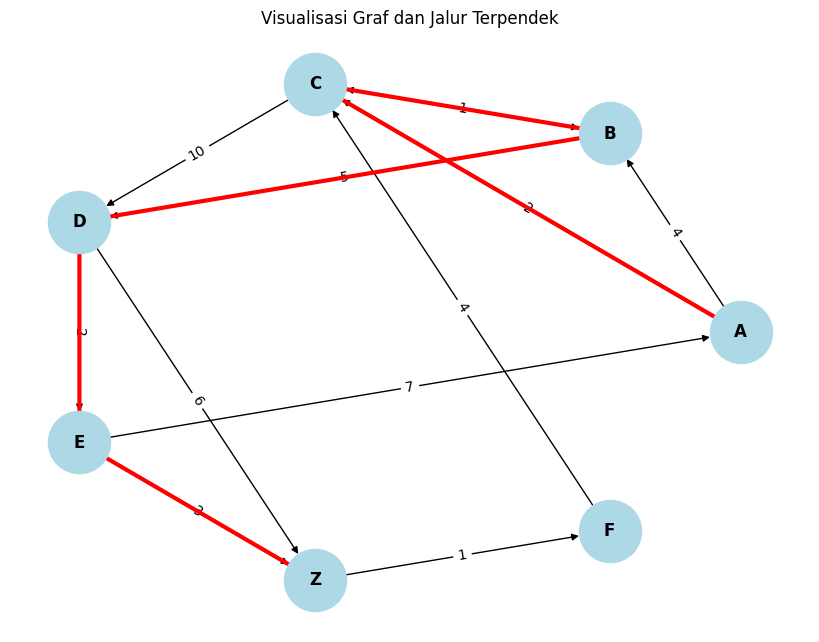


Visualisasi dengan layout kamada_kawai:


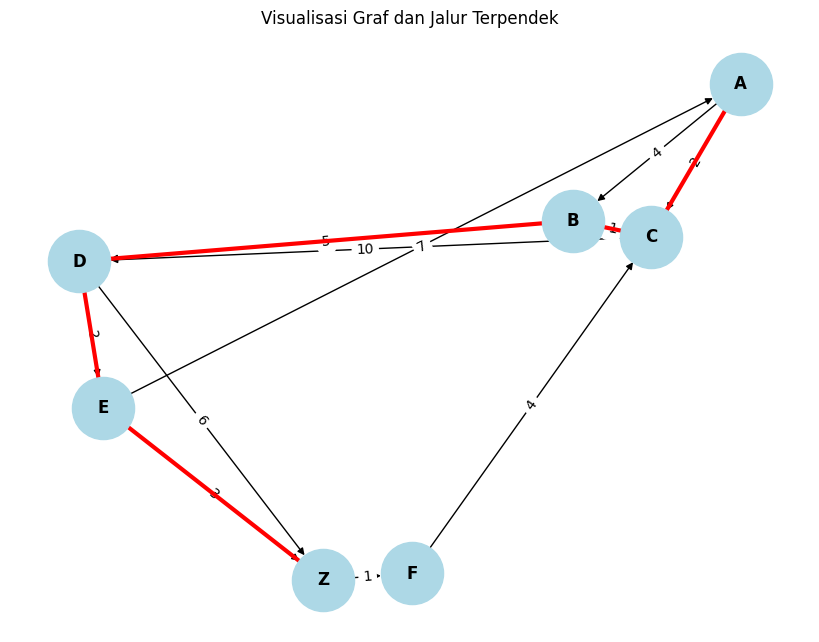

In [2]:
import heapq                       # Untuk membuat priority queue pada algoritma Dijkstra
import networkx as nx              # Untuk membuat dan memvisualisasikan graf
import matplotlib.pyplot as plt    # Untuk menampilkan visualisasi graf

# Algoritma Dijkstra untuk menghitung jarak terpendek dari simpul awal
def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}  # Inisialisasi jarak awal semua node ke ∞
    distances[start] = 0                                 # Jarak dari simpul awal ke dirinya sendiri adalah 0
    previous = {node: None for node in graph}            # Menyimpan node sebelumnya untuk rekonstruksi jalur
    queue = [(0, start)]                                 # Priority queue berisi tuple (jarak, simpul)

    while queue:                                         # Selama masih ada simpul dalam antrian
        current_distance, current_node = heapq.heappop(queue)  # Ambil simpul dengan jarak terkecil

        for neighbor, weight in graph[current_node].items():   # Iterasi ke semua tetangga simpul saat ini
            distance = current_distance + weight               # Hitung jarak total dari simpul awal
            if distance < distances[neighbor]:                 # Jika lebih pendek dari jarak sebelumnya
                distances[neighbor] = distance                 # Perbarui jarak minimum
                previous[neighbor] = current_node              # Simpan simpul sebelumnya
                heapq.heappush(queue, (distance, neighbor))    # Tambahkan tetangga ke antrian

    return distances, previous                                 # Kembalikan hasil jarak dan jalur sebelumnya

# Fungsi untuk merekonstruksi jalur dari simpul akhir ke awal
def get_path(previous, target):
    path = []                                  # List kosong untuk menyimpan jalur
    while target is not None:                  # Ulangi selama masih ada simpul yang ditelusuri
        path.insert(0, target)                 # Masukkan simpul ke awal list (karena kita mundur dari target)
        target = previous[target]              # Bergerak ke simpul sebelumnya
    return path                                # Kembalikan jalur sebagai list

# Fungsi untuk memvisualisasikan graf dan jalur terpendek
def visualize_graph(graph, path=None, layout_type='spring'):
    G = nx.DiGraph()                           # Buat directed graph kosong

    for node in graph:                         # Tambahkan edge ke graf dari dictionary
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)  # Tambahkan edge dan bobotnya

    # Tentukan tata letak visualisasi
    if layout_type == 'circular':
        pos = nx.circular_layout(G)            # Tata letak melingkar
    elif layout_type == 'kamada':
        pos = nx.kamada_kawai_layout(G)        # Tata letak Kamada-Kawai
    else:
        pos = nx.spring_layout(G)              # Tata letak default (pegas)

    edge_labels = nx.get_edge_attributes(G, 'weight')  # Ambil label bobot edge

    plt.figure(figsize=(8, 6))                 # Ukuran gambar
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000,
            font_weight='bold', arrows=True)   # Gambar node dan edge
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Gambar label bobot

    # Gambar jalur terpendek dengan garis merah tebal
    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))  # Buat pasangan edge dari jalur
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Visualisasi Graf dan Jalur Terpendek")  # Judul visualisasi
    plt.axis('off')                          # Sembunyikan sumbu
    plt.show()                               # Tampilkan visualisasi

# --- Definisi graf berbobot dan berarah (dengan siklus dan simpul baru) ---
graph = {
    'A': {'B': 4, 'C': 2},                   # A terhubung ke B (4), C (2)
    'B': {'C': 1, 'D': 5},                   # B terhubung ke C (1), D (5)
    'C': {'B': 1, 'D': 10},                  # C terhubung ke B (1), D (10)
    'D': {'E': 2, 'Z': 6},                   # D ke E (2), Z (6)
    'E': {'Z': 3, 'A': 7},                   # E ke Z (3), kembali ke A (membentuk siklus)
    'Z': {'F': 1},                           # Z ke F (1)
    'F': {'C': 4},                           # F ke C (4), siklus baru terbentuk
}

# Jalankan algoritma Dijkstra dari simpul A ke Z
start_node = 'A'                             # Simpul awal
end_node = 'Z'                               # Simpul tujuan
distances, previous = dijkstra_with_paths(graph, start_node)  # Jalankan Dijkstra

# Rekonstruksi jalur terpendek dari A ke Z
shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")    # Tampilkan jarak
print(f"Jalur: {' -> '.join(shortest_path)}")                             # Tampilkan jalur

# Visualisasi graf menggunakan layout circular
print("\nVisualisasi dengan layout circular:")
visualize_graph(graph, path=shortest_path, layout_type='circular')

# Visualisasi graf menggunakan layout kamada-kawai
print("\nVisualisasi dengan layout kamada_kawai:")
visualize_graph(graph, path=shortest_path, layout_type='kamada')
